In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nanonets import Simulation
from nanonets.utils import display_network, update_circle_colors
from matplotlib.animation import FuncAnimation

import scienceplots
plt.style.use(["science","bright","grid"])

/home/jonasmensing/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Topology
N_x, N_y            = 5,5
N_particles         = N_x*N_y
topology_parameter  = {
    "Nx"                : N_x,
    "Ny"                : N_y,
    "e_pos"             : [[0,0],[N_x-1,N_y-1]],
    "electrode_type"    : ['constant','constant']
}

# Voltages
N_voltages  = 101
N_electrode = len(topology_parameter["e_pos"])
input_volt  = np.linspace(-0.1,0.1,N_voltages)
volt        = np.zeros(shape=(N_voltages,N_electrode+1))
volt[:,0]   = input_volt

In [3]:
# Run static simulation
sim_class = Simulation(topology_parameter)
sim_class.run_static_voltages(voltages=volt, target_electrode=(N_electrode-1))

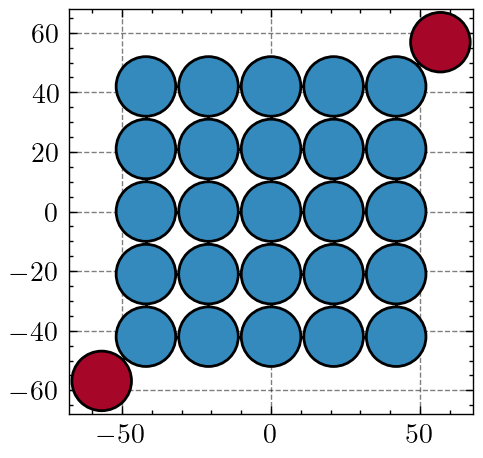

In [4]:
# Display Network
G           = sim_class.get_graph()
pos         = sim_class.get_positions()
net_topo    = sim_class.get_net_topology()
radius      = sim_class.get_radius()

fig, ax = plt.subplots(dpi=200)
fig, ax = display_network(G, pos, radius, net_topo, fig=fig, ax=ax)

In [5]:
x       = input_volt.copy()*1e3                             # [mV]
y       = sim_class.get_observable_storage()*1e-9           # [nA]
y_e     = sim_class.get_observable_error_storage()*1e-9     # [nA]
pot     = sim_class.get_potential_storage()*1e3             # [mV]
i_net   = sim_class.get_network_current_storage()           # [aA]

Text(0, 0.5, '$I$ [nA]')

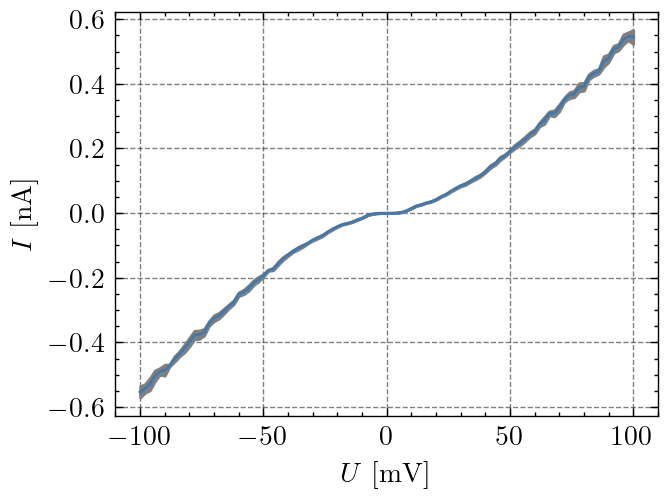

In [27]:
fig, ax = plt.subplots(dpi=200)
ax.plot(x, y)
ax.fill_between(x, y-y_e, y+y_e, color='grey')
ax.set_xlabel("$U$ [mV]")
ax.set_ylabel("$I$ [nA]")

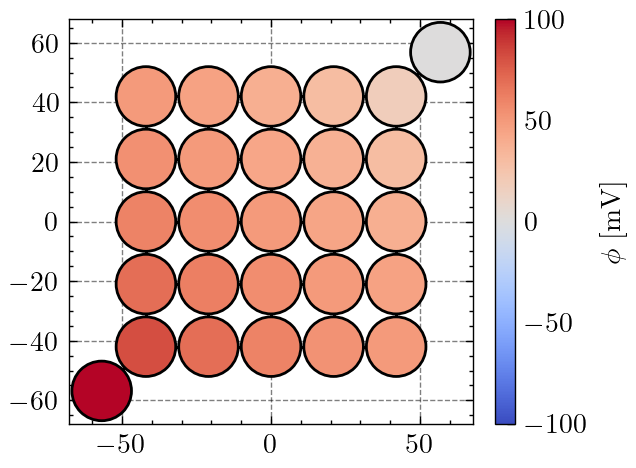

In [28]:
pots_plot   = np.hstack([pot[:,2:],pot[:,:2]])
fig, ax     = plt.subplots(dpi=200)
fig, ax     = display_network(G, pos, radius, net_topo, fig=fig, ax=ax)
update_circle_colors(ax=ax, pot=pots_plot[-1,], vlim=100, colorbar=True)

In [29]:
def animate(frame):
    for cb in ax.figure.axes:
        if cb != ax:  # only remove colorbars, not main ax
            cb.remove()
    update_circle_colors(ax, pots_plot[frame], vlim=100, colorbar=False)
    return ax.patches[:len(radius)]  # only return NP circles for blitting

ani = FuncAnimation(fig, animate, frames=len(pots_plot), interval=100, blit=False)
ani.save("potential_animation.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.
